# Genetic Algorithm Portfolio Optimization

## Dependencies Set-up

In [2]:
# --- Import Required Libraries ---
import os
import sys
import matplotlib.pyplot as plt

# --- Set Up Paths ---
ROOT_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ROOT_PATH not in sys.path:
    sys.path.insert(0, ROOT_PATH)
    
# --- Import Custom Libraries ---
from pop.runner import runner
from pop.util.print_results import print_results
from pop.util.file_saver import prepare_file_saving, save_results, save_fitness_history, save_diversity_history

## Parameters Definition

In [3]:
# --- Define Experiment Parameters ---
# Algorithm type: 'ga' (Genetic Algorithm) or 'pso' (Particle Swarm Optimization)
algorithm_type = "pso"

# Dataset folder name
dataset_folder_name = "../dataset"

# Number of companies to include in the portfolio
num_companies = 100

# Annual risk-free rate
risk_free_rate_annual = 0.042

# Analysis period
start_date = "2015-01-01"
end_date = "2020-01-01"

# Correlation level (optional): 'low', 'medium', 'high', or None
correlation_level = 'high'

# Random seed for reproducibility
seed = 0

## Hyperparameter & Model Configuration

In [4]:
# --- Algorithm-Specific Parameters ---
# GA Parameters
ga_params = {
    "pop_size": 100,
    "max_generations": 300,
    "mutation_rate": 0.1,
    "gaussian_stdev": 0.1,
    "num_elites": 1,
    "tournament_size": 3,
}

# PSO Parameters
pso_params = {
    "swarm_size": 100,
    "max_iterations": 300,
    "w": 0.5,
    "c1": 1.5,
    "c2": 2.0,
}

# Repair method for constraint handling: 'normalize', 'clip', 'restart', 'shrink'
repair_method = "normalize"

## Experiment Execution

In [5]:
# --- Execute Experiment ---
if algorithm_type == "ga":
    params = ga_params
elif algorithm_type == "pso":
    params = pso_params
else:
    raise ValueError("Invalid algorithm type. Choose 'ga' or 'pso'.")

# Run the experiment
(results, fitness_history, diversity_history) = runner(
    algorithm_type=algorithm_type,
    dataset_folder_name=dataset_folder_name,
    num_companies=num_companies,
    risk_free_rate_annual=risk_free_rate_annual,
    start_date=start_date,
    end_date=end_date,
    correlation_level=correlation_level,
    seed=seed,
    repair_method=repair_method,
    **params
)

# --- Display Results ---
sharpe_ratio, annual_return, weights = results
print_results(sharpe_ratio, annual_return, weights)


                         PORTFOLIO OPTIMIZATION RESULTS

Sharpe Ratio: 0.7087849497435678
Annual Return: 0.19366594113317961 (19.366594113317962%)

Portfolio Distribution:
--------------------------------------------------------------------------------
Company                                           Weight      Percentage
--------------------------------------------------------------------------------
Franklin Financial Services Corporation - Co...     0.1000          10.00%
Eagle Bancorp Montana, Inc. - Common Stock        0.1000          10.00%
Jack Henry & Associates, Inc. - Common Stock      0.0999           9.99%
Charter Communications, Inc. - Class A Commo...     0.0999           9.99%
First United Corporation - Common Stock           0.0997           9.97%
Camtek Ltd. - Ordinary Shares                     0.0996           9.96%
Primerica, Inc. Common Stock                      0.0993           9.93%
Iteris, Inc. - Common Stock                       0.0985           9.85%
Texa

In [6]:
# --- Save Results ---
# Prepare file saving
params = ga_params if algorithm_type == "ga" else pso_params
results_dir, filename = prepare_file_saving(
    algorithm_type=algorithm_type,
    correlation_level=correlation_level,
    params=params,
    root_path=os.path.join(ROOT_PATH, "experiments", "results")
)

# Save results
save_results(results_dir, filename, weights, sharpe_ratio, annual_return)

Results saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_results.csv


In [7]:
# Save fitness history
save_fitness_history(results_dir, filename, fitness_history)

Fitness history saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_fitness.csv


In [8]:
# Save diversity history
save_diversity_history(results_dir, filename, diversity_history)

Diversity history saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_diversity.csv


## Visualize fitness evolution

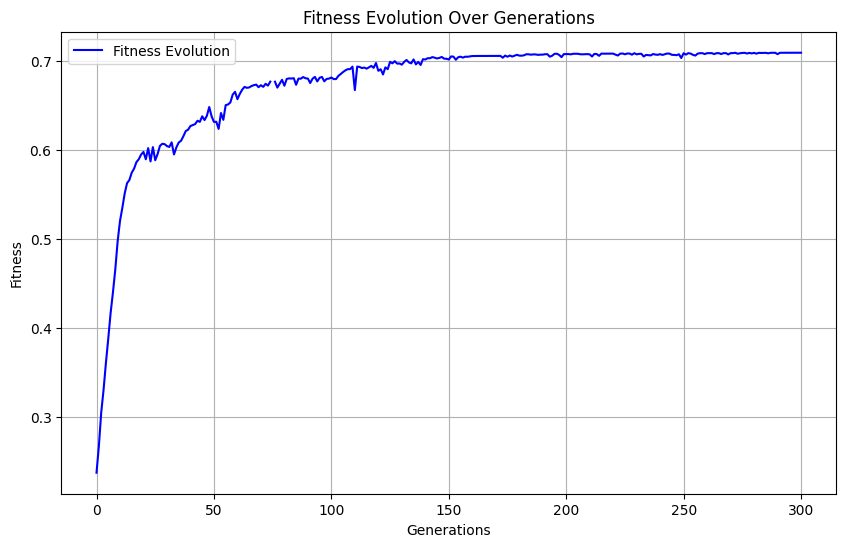

In [9]:
# ---Plotting Fitness Evolution---
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, label="Fitness Evolution", color="blue")
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.show()

In [10]:
# --- Save Fitness Evolution Plot ---
fitness_plot_path = os.path.join(results_dir, f"{filename}_fitness_evolution.png")
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, label="Fitness Evolution", color="blue")
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.savefig(fitness_plot_path)
plt.clf()
print(f"Fitness evolution plot saved to {fitness_plot_path}")

Fitness evolution plot saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_fitness_evolution.png


<Figure size 1000x600 with 0 Axes>

## Visualize diversity evolution

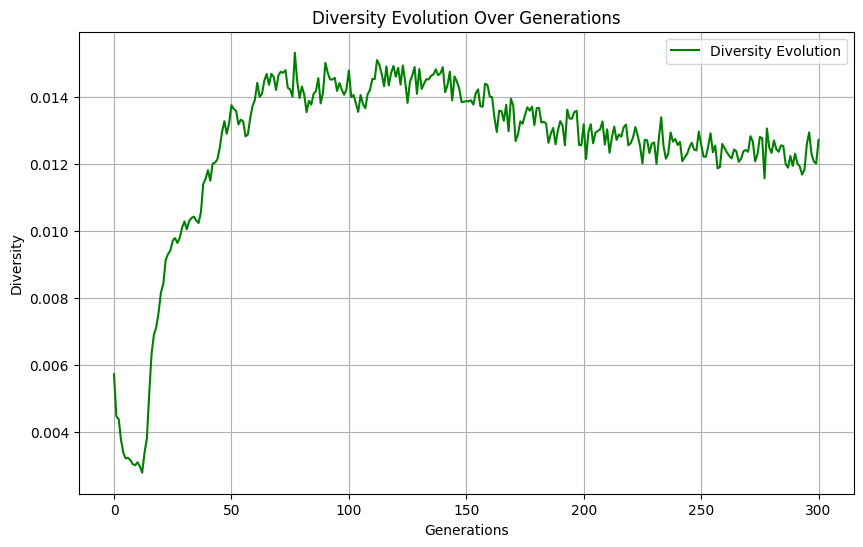

In [11]:
# --- Plot Diversity Evolution ---
plt.figure(figsize=(10, 6))
plt.plot(diversity_history, label="Diversity Evolution", color="green")
plt.title("Diversity Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Diversity")
plt.legend()
plt.grid()
plt.show()

In [12]:
# --- Save Diversity Evolution Plot ---
diversity_plot_path = os.path.join(results_dir, f"{filename}_diversity_evolution.png")
plt.figure(figsize=(10, 6))
plt.plot(diversity_history, label="Diversity Evolution", color="green")
plt.title("Diversity Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Diversity")
plt.legend()
plt.grid()
plt.savefig(diversity_plot_path)
plt.clf()
print(f"Diversity evolution plot saved to {diversity_plot_path}")

Diversity evolution plot saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_diversity_evolution.png


<Figure size 1000x600 with 0 Axes>

-----

## Fine Tuning

In [13]:
from itertools import product
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare

In [14]:
# Get the absolute path to the project root
def get_project_root():
    # Find the project root by moving up the directory structure
    project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
    return project_root

# Construct the path for the results folder
def get_results_path(filename, algorithm=None):
    project_root = get_project_root()
    if algorithm:
        return os.path.join(project_root, "experiments", "results", algorithm, filename)
    return os.path.join(project_root, "experiments", "results", filename)

In [ ]:
# Number of runs for statistically significant results
NUM_RUNS = 31

# Inherit globally defined variables
DATASET = dataset_folder_name
NUM_COMPANIES = num_companies
RISK_FREE_RATE = risk_free_rate_annual
START_DATE = start_date
END_DATE = end_date

# Hyperparameters for Genetic Algorithm (GA)
ga_param_grid = {
    "pop_size": [20, 50, 100],
    "mutation_rate": [0.01, 0.05, 0.1],
    "gaussian_stdev": [0.01, 0.05, 0.1],
    "num_elites": [1, 2, 5],
    "max_generations": [50, 100]
}

# Hyperparameters for Particle Swarm Optimization (PSO)
pso_param_grid = {
    "swarm_size": [20, 50, 100],
    "max_iterations": [50, 100],
    "w": [0.4, 0.7, 0.9],
    "c1": [1.0, 1.5, 2.0],
    "c2": [1.0, 1.5, 2.0]
}

# Possible repair methods
REPAIR_METHODS = ["normalize", "clip", "restart", "shrink"]

# Helper function to create parameter combinations
def get_param_combinations(param_grid):
    keys, values = zip(*param_grid.items())
    return [dict(zip(keys, combo)) for combo in product(*values)]

# Function to evaluate a specific configuration
def evaluate_config(algorithm_type, config, repair_method):
    scores, times, returns, generations = [], [], [], []

    # Prepare file saving
    results_dir, base_filename = prepare_file_saving(
        algorithm_type=algorithm_type,
        correlation_level=correlation_level,
        params=config,
        root_path=os.path.join(os.pardir, "experiments", "results")
    )

    for run_id in range(1, NUM_RUNS + 1):
        start = time.time()
        try:
            # Run the experiment
            results, fitness_history, diversity_history = runner(
                algorithm_type=algorithm_type,
                dataset_folder_name=DATASET,
                num_companies=NUM_COMPANIES,
                risk_free_rate_annual=RISK_FREE_RATE,
                start_date=START_DATE,
                end_date=END_DATE,
                correlation_level=correlation_level,
                seed=seed + run_id,
                repair_method=repair_method,
                **config
            )

            # Unpack the results
            sharpe_ratio, annual_return, weights = results
            runtime = time.time() - start
            num_generations = len(fitness_history)

            # Log results
            scores.append(sharpe_ratio)
            returns.append(annual_return)
            times.append(runtime)
            generations.append(num_generations)

            # Save intermediate run results
            run_filename = f"{base_filename}_run{run_id}"
            save_results(results_dir, run_filename, weights, sharpe_ratio, annual_return)
            save_fitness_history(results_dir, run_filename, fitness_history)
            save_diversity_history(results_dir, run_filename, diversity_history)

            print(f"✅ Run {run_id}/{NUM_RUNS} completed for {algorithm_type} - {config}")

        except Exception as e:
            print(f"Error during evaluation of {algorithm_type} with config {config}: {e}")

    # Aggregate results after all runs are completed
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    mean_return = np.mean(returns)
    mean_time = np.mean(times)
    mean_generations = np.mean(generations)

    # Save the aggregated results just once
    aggregated_filename = f"{base_filename}_aggregated"
    print(f"Aggregated results for {algorithm_type} - {config}: Sharpe {mean_score:.4f}, Return {mean_return:.4f}")
    save_results(results_dir, aggregated_filename, weights, mean_score, mean_return)
    save_fitness_history(results_dir, aggregated_filename, fitness_history)
    save_diversity_history(results_dir, aggregated_filename, diversity_history)

    return mean_score, std_score, mean_return, mean_time, mean_generations, config

# Fine-tuning process for both GA and PSO algorithms
def fine_tune_algorithms():
    results = []

    for algo_type, param_grid in [("GA", ga_param_grid), ("PSO", pso_param_grid)]:
        print(f"Starting fine-tuning for {algo_type}...")
        for repair in REPAIR_METHODS:
            for config in get_param_combinations(param_grid):
                print(f"Testing {algo_type} with config: {config} + repair method: {repair}")
                mean_score, std_score, mean_return, mean_time, mean_generations, used_config = evaluate_config(
                    algo_type.lower(), config, repair)
                results.append({
                    "algorithm": algo_type,
                    "repair_method": repair,
                    "mean_sharpe": mean_score,
                    "std_sharpe": std_score,
                    "mean_return": mean_return,
                    "mean_time": mean_time,
                    "mean_generations": mean_generations,
                    **used_config
                })

    # Save fine-tuning results to algorithm-specific directory
    for algo_type in ["GA", "PSO"]:
        algo_results = [r for r in results if r['algorithm'] == algo_type]
        df = pd.DataFrame(algo_results)
        result_path = get_results_path("fine_tuning_results.csv", algo_type.lower())
        os.makedirs(os.path.dirname(result_path), exist_ok=True)
        df.to_csv(result_path, index=False)
        print(f"✅ Fine-tuning results for {algo_type} saved to '{result_path}'")

    return results

# Execute fine-tuning
fine_tuning_results = fine_tune_algorithms()


Starting fine-tuning for GA...
Testing GA with config: {'pop_size': 20, 'mutation_rate': 0.05, 'gaussian_stdev': 0.05, 'num_elites': 1, 'max_generations': 50} + repair method: normalize
Results saved to ..\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_run1_results.csv
Fitness history saved to ..\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_run1_fitness.csv
Diversity history saved to ..\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_run1_diversity.csv
✅ Run 1/31 completed for ga - {'pop_size': 20, 'mutation_rate': 0.05, 'gaussian_stdev': 0.05, 'num_elites': 1, 'max_generations': 50}
Results saved to ..\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_run2_results.csv
Fitness history saved to ..\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_run2_fitness.csv
Diversity history saved to ..\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_run2_diversity.csv
✅ Run 2/31 completed for ga - {'pop_size': 20, 'mutation_rate': 0.05, 'gaussian_stdev': 0.05, 'num_elites': 1, 'max_generati

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run1_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run1_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run1_diversity.csv
✅ Run 1/31 completed for pso - {'swarm_size': 20, 'max_iterations': 50, 'w': 0.5, 'c1': 2.0, 'c2': 2.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run2_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run2_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run2_diversity.csv
✅ Run 2/31 completed for pso - {'swarm_size': 20, 'max_iterations': 50, 'w': 0.5, 'c1': 2.0, 'c2': 2.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run3_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run3_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-2

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run1_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run1_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run1_diversity.csv
✅ Run 1/31 completed for pso - {'swarm_size': 20, 'max_iterations': 50, 'w': 0.5, 'c1': 2.0, 'c2': 2.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run2_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run2_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run2_diversity.csv
✅ Run 2/31 completed for pso - {'swarm_size': 20, 'max_iterations': 50, 'w': 0.5, 'c1': 2.0, 'c2': 2.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run3_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.5_run3_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-2

In [25]:
# Get the absolute path to the project root
def get_project_root():
    current_dir = os.getcwd()
    while True:
        if os.path.basename(current_dir) == "BAO_Portfolio-Optimization-Problem":
            return current_dir
        parent_dir = os.path.dirname(current_dir)
        if parent_dir == current_dir:
            raise FileNotFoundError("Project root 'BAO_Portfolio-Optimization-Problem' not found.")
        current_dir = parent_dir

# Construct the path for the results folder
def get_results_path(filename, algorithm=None):
    project_root = get_project_root()
    if algorithm:
        return os.path.join(project_root, "experiments", "results", algorithm, filename)
    return os.path.join(project_root, "experiments", "results", filename)

# Load fine-tuning results from both algorithm files (GA and PSO)
def load_fine_tuning_results():
    ga_file_path = get_results_path("fine_tuning_results.csv", "ga")
    pso_file_path = get_results_path("fine_tuning_results.csv", "pso")
    try:
        print(f"🔍 Loading GA results from: {ga_file_path}")
        ga_results = pd.read_csv(ga_file_path)
    except FileNotFoundError:
        print(f"⚠️ GA fine-tuning results not found at {ga_file_path}.")
        ga_results = None

    try:
        print(f"🔍 Loading PSO results from: {pso_file_path}")
        pso_results = pd.read_csv(pso_file_path)
    except FileNotFoundError:
        print(f"⚠️ PSO fine-tuning results not found at {pso_file_path}.")
        pso_results = None

    if ga_results is not None and pso_results is not None:
        combined_results = pd.concat([ga_results, pso_results], ignore_index=True)
        print("✅ Combined GA and PSO results loaded successfully.")
        return combined_results
    elif ga_results is not None:
        print("✅ Only GA results loaded successfully.")
        return ga_results
    elif pso_results is not None:
        print("✅ Only PSO results loaded successfully.")
        return pso_results
    else:
        print("⚠️ No fine-tuning results found for either algorithm.")
        return None

# Function to find the best, median, and worst configurations
def select_configs(df, algorithm):
    df_algo = df[df["algorithm"] == algorithm]
    best_config = df_algo.loc[df_algo["mean_sharpe"].idxmax()].copy()
    worst_config = df_algo.loc[df_algo["mean_sharpe"].idxmin()].copy()
    median_config = df_algo.iloc[(len(df_algo) // 2)].copy()

    best_config["quality"] = "best"
    median_config["quality"] = "median"
    worst_config["quality"] = "worst"

    return best_config, median_config, worst_config

# Adjusted function to load fitness and diversity history
def load_history(algorithm, base_filename, quality):
    project_root = get_project_root()
    results_path = os.path.join(project_root, "experiments", "results", algorithm)

    # Look for aggregated fitness and diversity files
    fitness_file = os.path.join(results_path, f"{base_filename}_aggregated_fitness.csv")
    diversity_file = os.path.join(results_path, f"{base_filename}_aggregated_diversity.csv")

    if os.path.exists(fitness_file):
        fitness_history = pd.read_csv(fitness_file)
        print(f"✅ Loaded aggregated fitness history for {algorithm.upper()} - {quality} from {fitness_file}")
    else:
        print(f"❌ No aggregated fitness history found for {algorithm.upper()} - {quality}")
        fitness_history = None

    if os.path.exists(diversity_file):
        diversity_history = pd.read_csv(diversity_file)
        print(f"✅ Loaded aggregated diversity history for {algorithm.upper()} - {quality} from {diversity_file}")
    else:
        print(f"❌ No aggregated diversity history found for {algorithm.upper()} - {quality}")
        diversity_history = None

    return fitness_history, diversity_history

# Generate the base filename correctly based on the algorithm type and parameters
def generate_base_filename(config, algorithm):
    if algorithm == "ga":
        pop_size = int(config["pop_size"]) if not pd.isna(config["pop_size"]) else "NA"
        max_gen = int(config["max_generations"]) if not pd.isna(config["max_generations"]) else "NA"
        mutation_rate = config["mutation_rate"]
        return f"exp_H_ps-{pop_size}_mg-{max_gen}_mr-{mutation_rate}"
    elif algorithm == "pso":
        swarm_size = int(config["swarm_size"]) if not pd.isna(config["swarm_size"]) else "NA"
        max_iter = int(config["max_iterations"]) if not pd.isna(config["max_iterations"]) else "NA"
        w = config["w"]
        return f"exp_H_ss-{swarm_size}_mi-{max_iter}_w-{w}"
    else:
        return "unknown_config"

# Function to print configuration details
def print_configuration_details(config, algo, config_name):
    print(f"🏆 {config_name.capitalize()} configuration for {algo.upper()}:")
    for key, value in config.items():
        if pd.notna(value):
            print(f"  {key}: {value}")
    print("\n")
    
# Save the selected configurations to a file
def save_selected_configs():
    fine_tuning_results = load_fine_tuning_results()
    if fine_tuning_results is not None:
        best_ga, median_ga, worst_ga = select_configs(fine_tuning_results, "GA")
        best_pso, median_pso, worst_pso = select_configs(fine_tuning_results, "PSO")

        selected_configs = pd.DataFrame([best_ga, median_ga, worst_ga, best_pso, median_pso, worst_pso])
        file_path = get_results_path("selected_configs.csv")
        selected_configs.to_csv(file_path, index=False)
        print(f"✅ Selected configurations saved to '{file_path}'")

        for config, algo in zip([best_ga, median_ga, worst_ga, best_pso, median_pso, worst_pso], 
                                ["ga", "ga", "ga", "pso", "pso", "pso"]):
            config_name = config["quality"]
            base_filename = generate_base_filename(config, algo)

            try:
                fitness_history, diversity_history = load_history(algo, base_filename, config_name)

                if fitness_history is not None and diversity_history is not None:
                    print(f"✅ Fitness and diversity history loaded for {algo.upper()} - {config_name}")
                    print_configuration_details(config, algo, config_name)
                else:
                    print(f"❌ No complete history found for {algo.upper()} - {config_name}")

            except Exception as e:
                print(f"❌ Error loading history for {algo.upper()} - {config_name}: {e}")

    else:
        print("⚠️ No fine-tuning results found for saving configurations.")

# Save configurations
save_selected_configs()

🔍 Loading GA results from: c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\ga\fine_tuning_results.csv
🔍 Loading PSO results from: c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\fine_tuning_results.csv
✅ Combined GA and PSO results loaded successfully.
✅ Selected configurations saved to 'c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\selected_configs.csv'
✅ Loaded aggregated fitness history for GA - best from c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_aggregated_fitness.csv
✅ Loaded aggregated diversity history for GA - best from c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\ga\exp_H_ps-20_mg-50_mr-0.05_aggregated_diversity.csv
✅ Fitness and diversity history loaded for GA - best
🏆 Best configuration for GA:
  algorithm: GA
  repair_method: shrink
  mean_sharpe: 0.5257570880565234
  std_sharpe: 0.0196717390878874
  mean_return: 0.277687942795

## Visualization

In [34]:
# Get the absolute path to the project root
def get_project_root():
    current_dir = os.getcwd()
    while True:
        if os.path.basename(current_dir) == "BAO_Portfolio-Optimization-Problem":
            return current_dir
        parent_dir = os.path.dirname(current_dir)
        if parent_dir == current_dir:
            raise FileNotFoundError("Project root 'BAO_Portfolio-Optimization-Problem' not found.")
        current_dir = parent_dir

# Construct the path for the results folder
def get_results_path(filename, algorithm=None):
    project_root = get_project_root()
    if algorithm:
        return os.path.join(project_root, "experiments", "results", algorithm, filename)
    return os.path.join(project_root, "experiments", "results", filename)

# Generate the base filename based on the configuration
def generate_base_filename(algorithm_type, config):
    if algorithm_type == "ga":
        return f"exp_H_ps-{int(config['pop_size'])}_mg-{int(config['max_generations'])}_mr-{config['mutation_rate']}"
    elif algorithm_type == "pso":
        return f"exp_H_ss-{int(config['swarm_size'])}_mi-{int(config['max_iterations'])}_w-{config['w']}"
    else:
        raise ValueError("Invalid algorithm type. Choose 'ga' or 'pso'.")

### Fitness and Diversity Evolution (GA and PSO)

- Plot the evolution of fitness and diversity over generations for each algorithm
- Separate plots for GA and PSO
- Display best, median, and worst configurations in the same plot for comparison

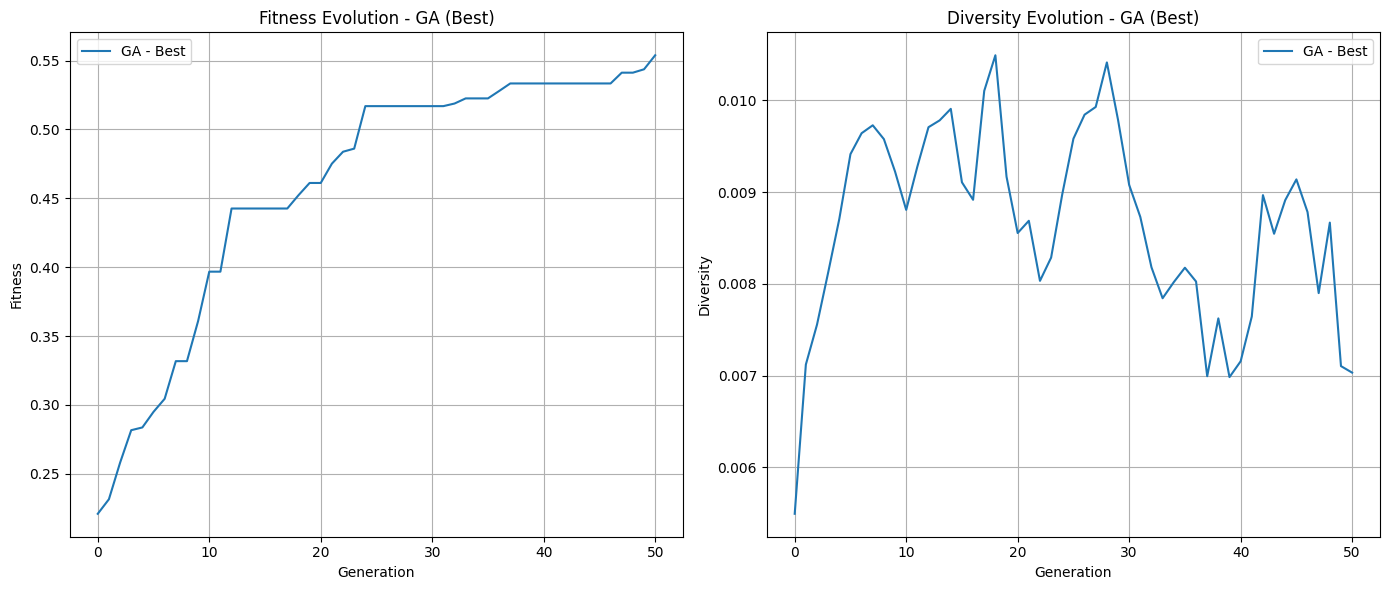

Fitness and diversity data plotted for GA - Best


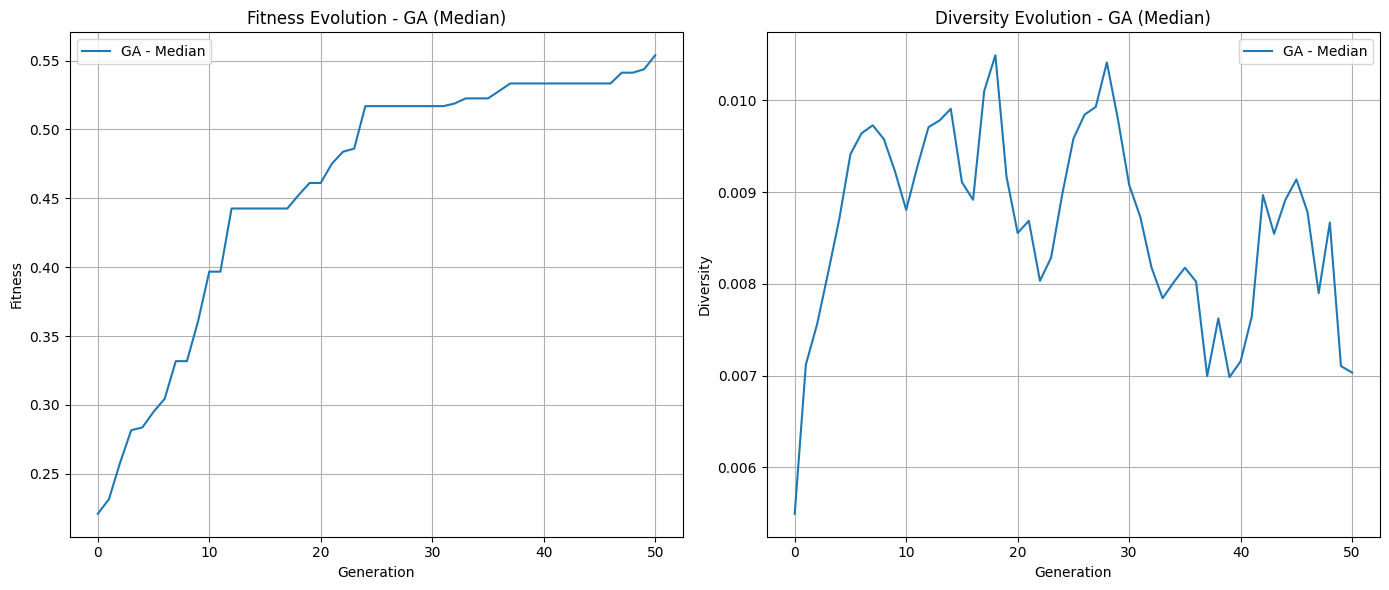

Fitness and diversity data plotted for GA - Median


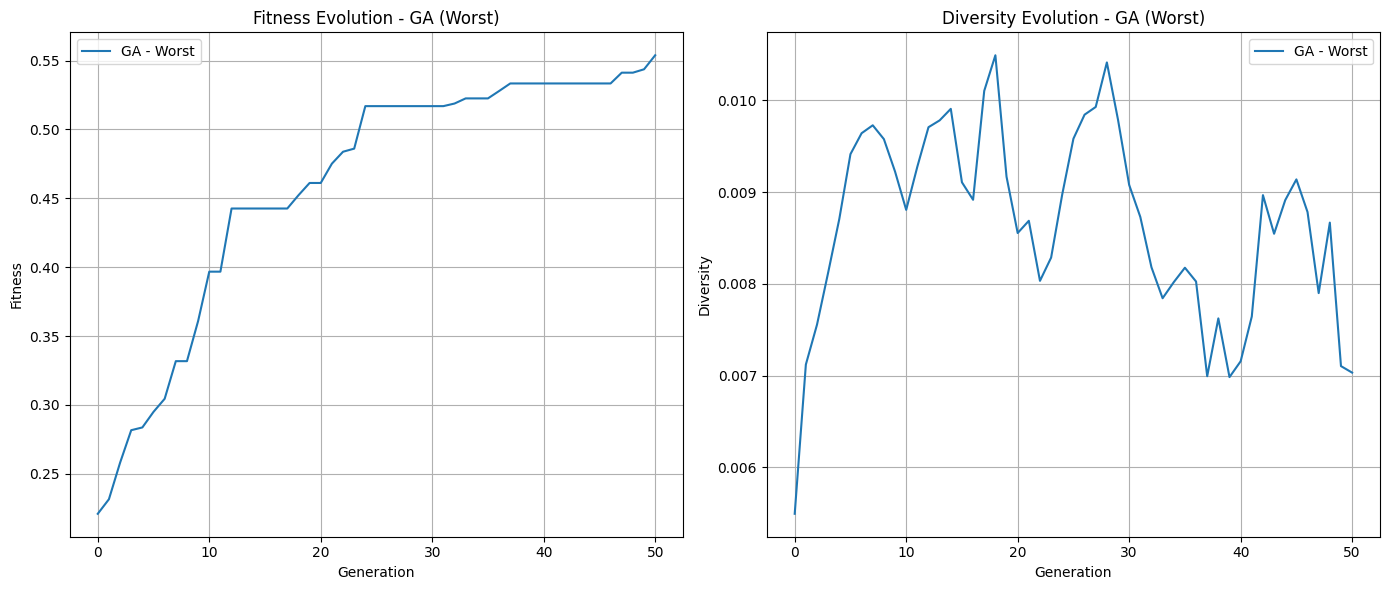

Fitness and diversity data plotted for GA - Worst


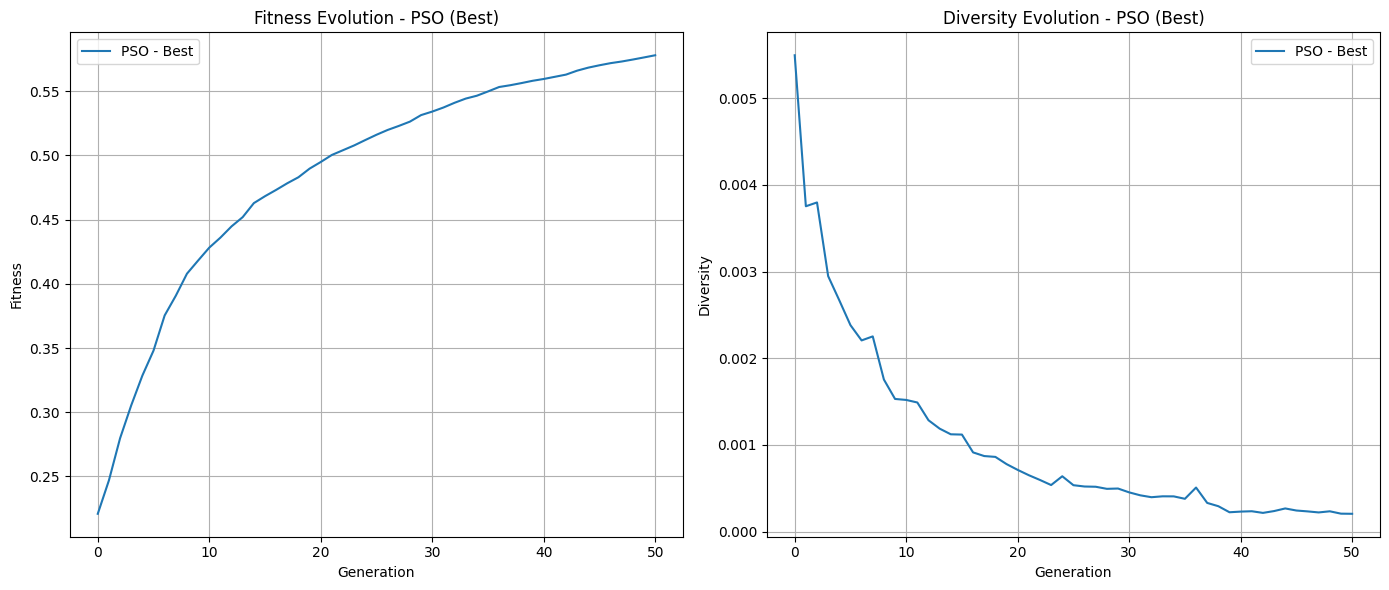

Fitness and diversity data plotted for PSO - Best


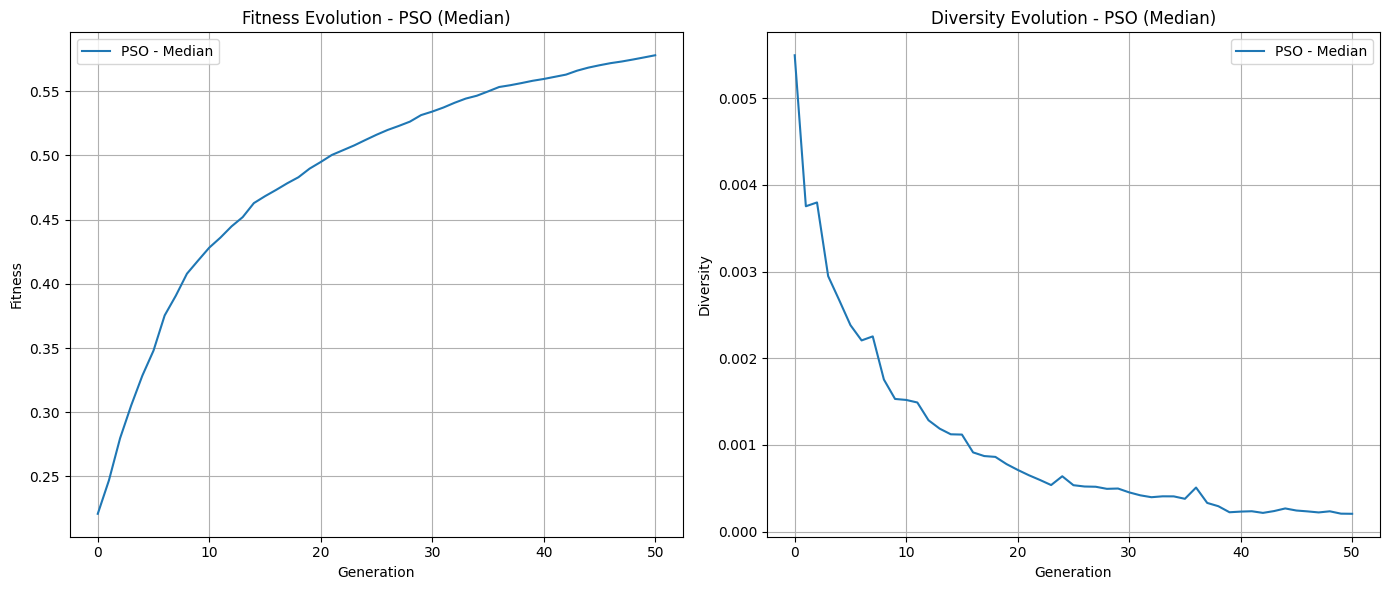

Fitness and diversity data plotted for PSO - Median


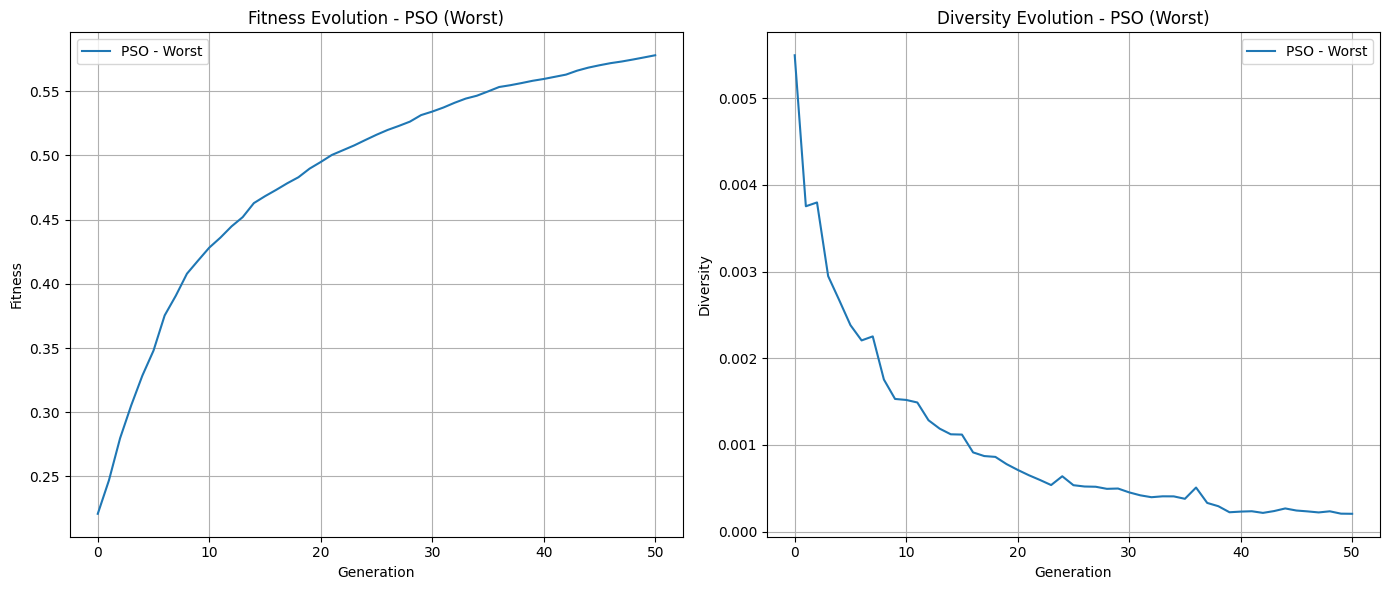

Fitness and diversity data plotted for PSO - Worst


In [37]:
# Load the selected configurations from the CSV file
selected_configs_path = get_results_path("selected_configs.csv")
selected_configs = pd.read_csv(selected_configs_path)

# Plotting function for fitness and diversity
def plot_fitness_diversity(algorithm_type, quality):
    # Get the relevant configuration
    config = selected_configs[(selected_configs["algorithm"] == algorithm_type.upper()) & (selected_configs["quality"] == quality)].iloc[0]
    
    # Generate the base filename from the configuration
    try:
        base_filename = generate_base_filename(algorithm_type, config)

        # Construct the paths for fitness and diversity data
        fitness_path = get_results_path(f"{base_filename}_aggregated_fitness.csv", algorithm_type)
        diversity_path = get_results_path(f"{base_filename}_aggregated_diversity.csv", algorithm_type)

        # Load the data
        fitness_data = pd.read_csv(fitness_path)
        diversity_data = pd.read_csv(diversity_path)

        plt.figure(figsize=(14, 6))

        # Plot Fitness Evolution
        plt.subplot(1, 2, 1)
        plt.plot(fitness_data['Generation'], fitness_data['Fitness'], label=f'{algorithm_type.upper()} - {quality.capitalize()}')
        plt.title(f'Fitness Evolution - {algorithm_type.upper()} ({quality.capitalize()})')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.grid(True)
        plt.legend()

        # Plot Diversity Evolution
        plt.subplot(1, 2, 2)
        plt.plot(diversity_data['Generation'], diversity_data['Diversity'], label=f'{algorithm_type.upper()} - {quality.capitalize()}')
        plt.title(f'Diversity Evolution - {algorithm_type.upper()} ({quality.capitalize()})')
        plt.xlabel('Generation')
        plt.ylabel('Diversity')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

        print(f"Fitness and diversity data plotted for {algorithm_type.upper()} - {quality.capitalize()}")

    except FileNotFoundError:
        print(f"❌ No fitness or diversity data found for {algorithm_type.upper()} - {quality.capitalize()}")
    except Exception as e:
        print(f"❌ Error while plotting for {algorithm_type.upper()} - {quality.capitalize()}: {e}")

# Plot for each algorithm and configuration quality
for algo in ["ga", "pso"]:
    for quality in ["best", "median", "worst"]:
        plot_fitness_diversity(algo, quality)

### Comparison of Best Fitness and Diversity between GA and PSO

- Compare the best fitness and diversity evolution between GA and PSO
- Helps in understanding which algorithm converges faster and maintains diversity

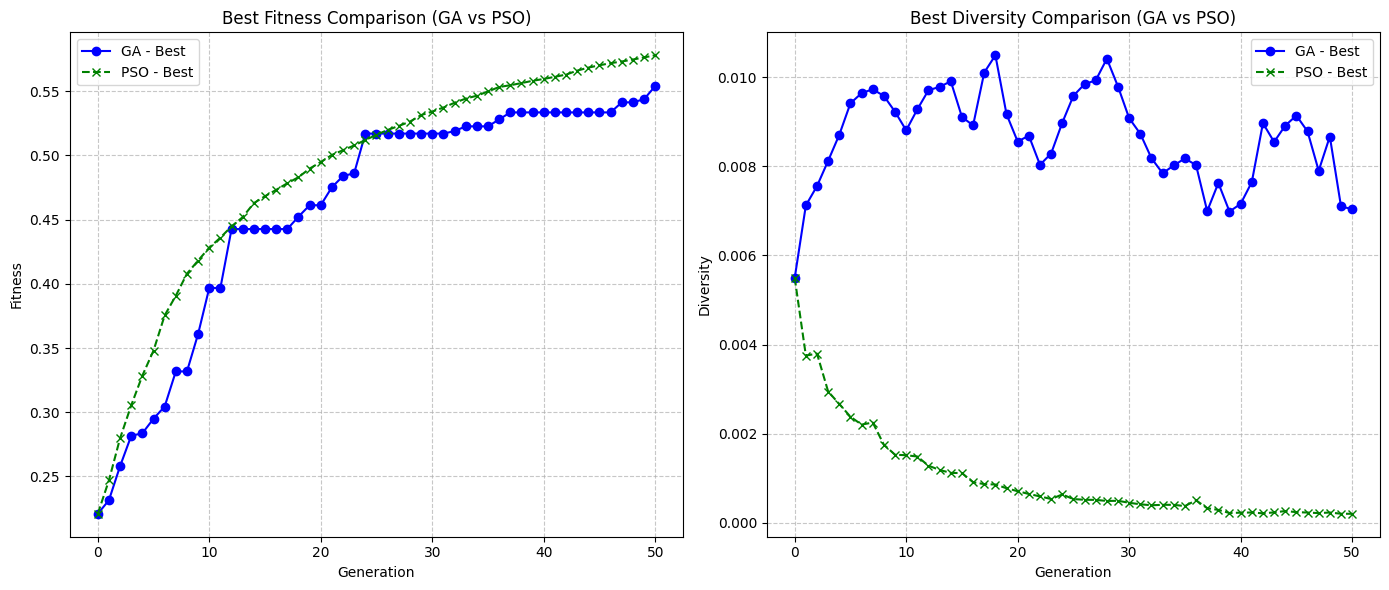

In [40]:
# Compare best fitness and diversity between GA and PSO
def compare_best_fitness_diversity():
    try:
        # Load selected configurations
        selected_configs_path = get_results_path("selected_configs.csv", "")
        selected_configs = pd.read_csv(selected_configs_path)

        # Load the best configurations for GA and PSO
        ga_config = selected_configs[(selected_configs["algorithm"] == "GA") & (selected_configs["quality"] == "best")].iloc[0]
        pso_config = selected_configs[(selected_configs["algorithm"] == "PSO") & (selected_configs["quality"] == "best")].iloc[0]

        # Generate base filenames
        ga_base_filename = generate_base_filename("ga", ga_config) + "_aggregated"
        pso_base_filename = generate_base_filename("pso", pso_config) + "_aggregated"

        # Load fitness and diversity data
        ga_fitness_path = get_results_path(f"{ga_base_filename}_fitness.csv", "ga")
        pso_fitness_path = get_results_path(f"{pso_base_filename}_fitness.csv", "pso")
        ga_diversity_path = get_results_path(f"{ga_base_filename}_diversity.csv", "ga")
        pso_diversity_path = get_results_path(f"{pso_base_filename}_diversity.csv", "pso")

        ga_fitness = pd.read_csv(ga_fitness_path)
        pso_fitness = pd.read_csv(pso_fitness_path)
        ga_diversity = pd.read_csv(ga_diversity_path)
        pso_diversity = pd.read_csv(pso_diversity_path)

        # Plot fitness and diversity comparisons
        plt.figure(figsize=(14, 6))

        # Fitness Comparison
        plt.subplot(1, 2, 1)
        plt.plot(ga_fitness['Generation'], ga_fitness['Fitness'], label='GA - Best', color='blue', linestyle='-', marker='o')
        plt.plot(pso_fitness['Generation'], pso_fitness['Fitness'], label='PSO - Best', color='green', linestyle='--', marker='x')
        plt.title('Best Fitness Comparison (GA vs PSO)')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()

        # Diversity Comparison
        plt.subplot(1, 2, 2)
        plt.plot(ga_diversity['Generation'], ga_diversity['Diversity'], label='GA - Best', color='blue', linestyle='-', marker='o')
        plt.plot(pso_diversity['Generation'], pso_diversity['Diversity'], label='PSO - Best', color='green', linestyle='--', marker='x')
        plt.title('Best Diversity Comparison (GA vs PSO)')
        plt.xlabel('Generation')
        plt.ylabel('Diversity')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()

        plt.tight_layout()
        plt.show()
        
    except FileNotFoundError as e:
        print(f"❌ Best fitness or diversity data not found: {e}")
    except Exception as e:
        print(f"❌ Error during comparison plotting: {e}")

# Run the comparison function
compare_best_fitness_diversity()

### Time taken per run

- A bar plot or box plot to show the time taken for each configuration
- Compare time taken between GA and PSO

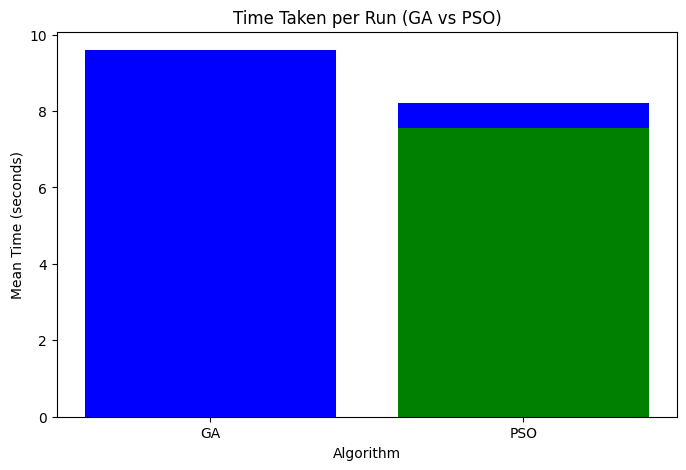

In [41]:
def plot_time_per_run():
    results = pd.read_csv("../experiments/results/selected_configs.csv")
    plt.figure(figsize=(8, 5))

    plt.bar(results['algorithm'], results['mean_time'], color=['blue', 'green'])
    plt.title('Time Taken per Run (GA vs PSO)')
    plt.xlabel('Algorithm')
    plt.ylabel('Mean Time (seconds)')
    plt.show()

plot_time_per_run()

### Final Fitness Distribution

- A box plot or violin plot showing the distribution of final fitness values for each algorithm
- Visualize the variability in performance

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4655: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4655: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\matplotlib\cbook.py:1277: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\matplotlib\cbook.py:1284: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = 

<Figure size 800x500 with 0 Axes>

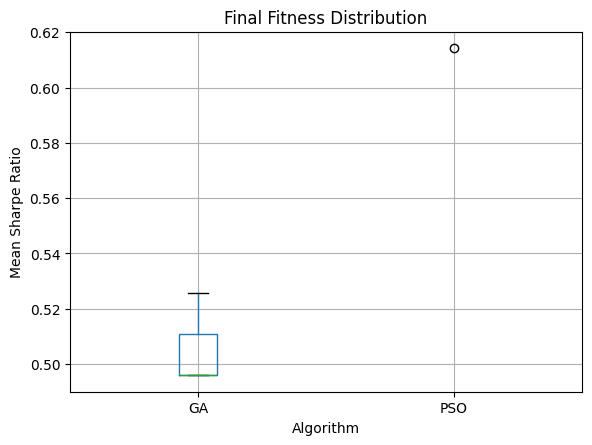

In [42]:
def plot_fitness_distribution():
    results = pd.read_csv("../experiments/results/selected_configs.csv")
    plt.figure(figsize=(8, 5))

    results.boxplot(column='mean_sharpe', by='algorithm')
    plt.title('Final Fitness Distribution')
    plt.suptitle('')
    plt.xlabel('Algorithm')
    plt.ylabel('Mean Sharpe Ratio')
    plt.show()

plot_fitness_distribution()

### Fitness vs. Time Tradeoff

- A scatter plot comparing the mean fitness vs. mean time taken
- Each point represents a different configuration

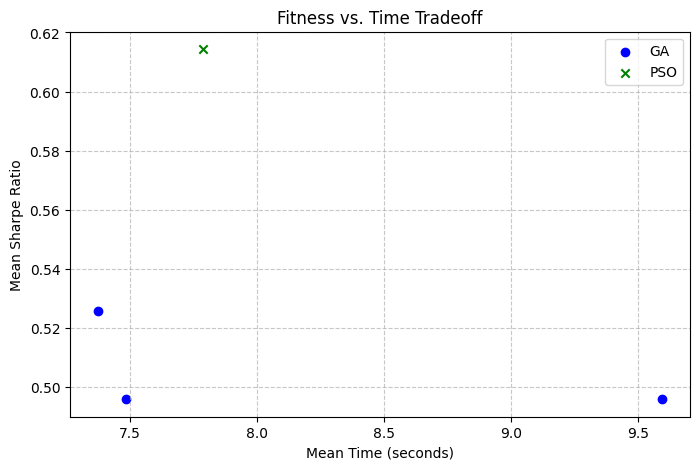

In [44]:
def plot_fitness_vs_time():
    # Load the results from the selected configurations
    results = pd.read_csv("../experiments/results/selected_configs.csv")
    plt.figure(figsize=(8, 5))

    # Filter results for GA and PSO separately
    ga_results = results[results['algorithm'] == 'GA']
    pso_results = results[results['algorithm'] == 'PSO']

    # Scatter plot for GA
    plt.scatter(ga_results['mean_time'], ga_results['mean_sharpe'], color='blue', label='GA', marker='o')

    # Scatter plot for PSO
    plt.scatter(pso_results['mean_time'], pso_results['mean_sharpe'], color='green', label='PSO', marker='x')

    # Plot settings
    plt.title('Fitness vs. Time Tradeoff')
    plt.xlabel('Mean Time (seconds)')
    plt.ylabel('Mean Sharpe Ratio')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_fitness_vs_time()